# Week4授業前課題1 アヤメの分類

## 3.分類問題の流れ

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。


この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。


練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。



## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


virgicolorとvirginica
sepal_lengthとpetal_length

《実際の問題では？》


実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
#データのダウンロードとXとY変数に代入
iris = load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

df_Y = pd.DataFrame(iris.target)
df_Y.columns = ["Species"]

# データ結合 concat（axis=1）で列に配合
df_0 = pd.concat((df_X, df_Y), axis=1)
df_0["Species_name"] = iris.target_names[df_0["Species"]]

In [3]:
# virgicolorとvirginica sepal_lengthとpetal_lengthに再構築する
df = df_0.iloc[50:, [0, 2, 5]].reset_index()
df = df.drop("index", axis=1)
display(df.head())
display(df.tail())

,sepal_length,petal_length,Species_name
0,7.0,4.7,versicolor
1,6.4,4.5,versicolor
2,6.9,4.9,versicolor
3,5.5,4.0,versicolor
4,6.5,4.6,versicolor


,sepal_length,petal_length,Species_name
95,6.7,5.2,virginica
96,6.3,5.0,virginica
97,6.5,5.2,virginica
98,6.2,5.4,virginica
99,5.9,5.1,virginica


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。


《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。


前処理
データに加工をしていきます。



/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83

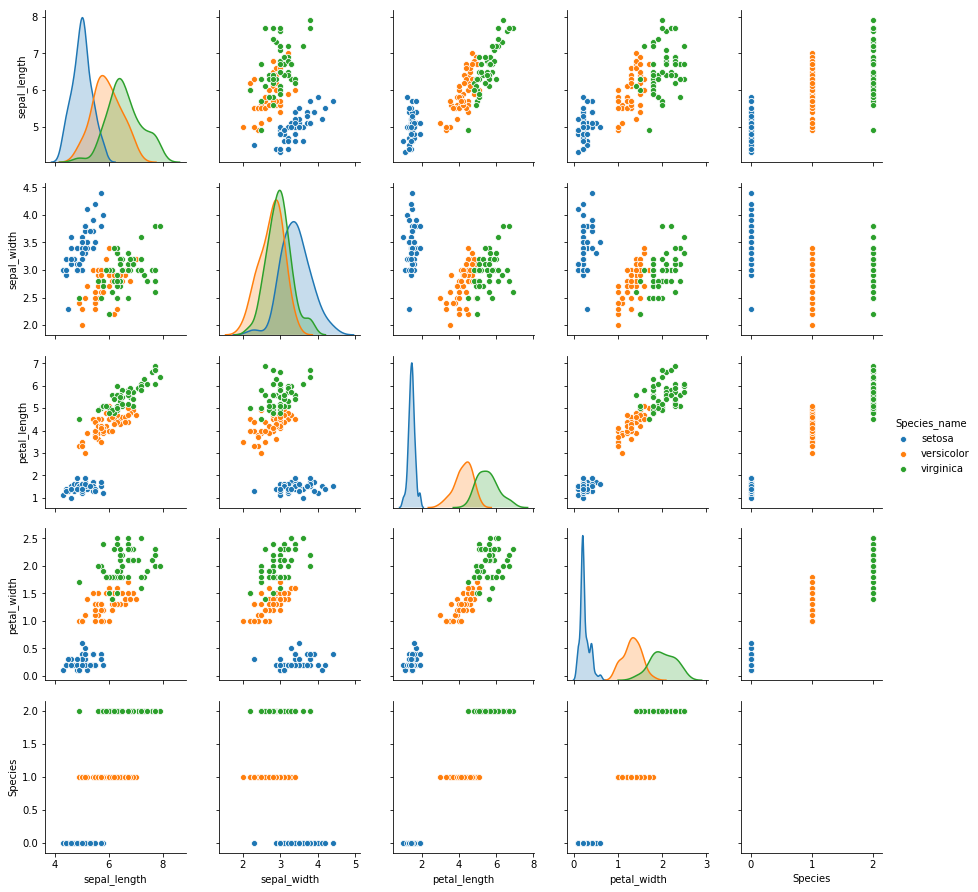

In [4]:
# 散布図行列で確認してみる

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df_0, hue="Species_name");

NameError: name 'axes' is not defined

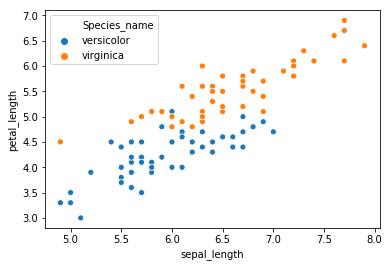

In [5]:
# 散布図
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="Species_name")
axes[0, 0].set_title("Scatter plot")

# joinplotなるものも学習 jointplotはhue引数が使えないようで色分け不可。
sns.jointplot('sepal_length', 'petal_length', data=df)

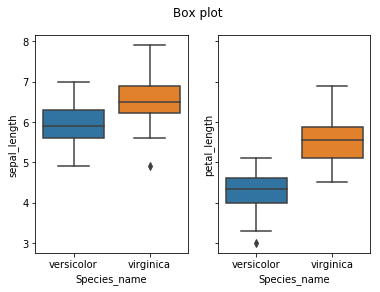

In [6]:
# 箱ひげ図
fig, axes = plt.subplots(ncols=2, sharey=True)
fig.suptitle("Box plot")
sns.boxplot(data=df, x="Species_name", y="sepal_length", ax=axes[0])
sns.boxplot(data=df, x="Species_name", y="petal_length", ax=axes[1])

plt.show()

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


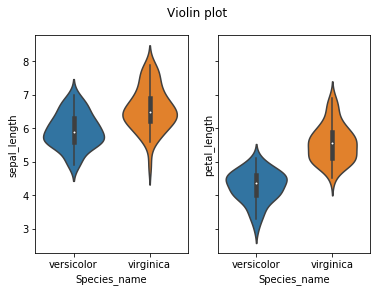

In [7]:
# バイオリン図
fig, axes = plt.subplots(ncols=2, sharey=True)
fig.suptitle("Violin plot")
sns.violinplot(data=df, x="Species_name", y="sepal_length", ax=axes[0])
sns.violinplot(data=df, x="Species_name", y="petal_length", ax=axes[1])

plt.show()

## 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :2].values
y = df_0.iloc[50:150, 4].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(75, 2)
(25, 2)


## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。


《実際の問題での前処理は？》


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。



In [10]:
from sklearn.neighbors import KNeighborsClassifier

# デフォルト5で分類
neigh_5nn = KNeighborsClassifier()

# 訓練データの検証
neigh_5nn.fit(X_train_scaler, y_train)

# 検証データの推定
y_pred_5nn = neigh_5nn.predict(X_test_scaler)

In [11]:
# n_neighbors=3で分類
neigh_3nn = KNeighborsClassifier(n_neighbors=3)

# 訓練データの検証
neigh_3nn.fit(X_train_scaler, y_train)

# 検証データの推定
y_pred_3nn = neigh_3nn.predict(X_test_scaler)

In [12]:
# n_neighbors=1で分類
neigh_1nn = KNeighborsClassifier(n_neighbors=1)

# 訓練データの検証
neigh_1nn.fit(X_train_scaler, y_train)

# 検証データの推定
y_pred_1nn = neigh_1nn.predict(X_test_scaler)

In [13]:
# n_neighbors=7で分類
neigh_7nn = KNeighborsClassifier(n_neighbors=7)

# 訓練データの検証
neigh_7nn.fit(X_train_scaler, y_train)

# 検証データの推定
y_pred_7nn = neigh_7nn.predict(X_test_scaler)

## 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_dict = {1: y_pred_1nn, 3: y_pred_3nn, 5: y_pred_5nn, 7: y_pred_7nn}

for i, y_pred in y_pred_dict.items():
    print("▼n_neighors:{}".format(i))
    print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
          .format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print("混同行列は\n{}".format(confusion_matrix(y_test, y_pred)))
    print()

▼n_neighors:1
正答率(accuracy_score):0.88, 適合率(precision):0.82, 再現率(Recall):1.00, F値:0.90
混同行列は
[[14  0]
 [ 3  8]]

▼n_neighors:3
正答率(accuracy_score):0.96, 適合率(precision):0.93, 再現率(Recall):1.00, F値:0.97
混同行列は
[[14  0]
 [ 1 10]]

▼n_neighors:5
正答率(accuracy_score):0.96, 適合率(precision):0.93, 再現率(Recall):1.00, F値:0.97
混同行列は
[[14  0]
 [ 1 10]]

▼n_neighors:7
正答率(accuracy_score):0.96, 適合率(precision):0.93, 再現率(Recall):1.00, F値:0.97
混同行列は
[[14  0]
 [ 1 10]]



## >4種類の指標値の意味について簡単に調査して文章でまとめる

- 正答率
予測値と正解値の整合率の割合。

- 適合率
予測がTrueと評価して、正解もTrueと評価されているものの割合

- 再現率
実際の正解がTrueと評価されているもので、正しくTrueと予測できたものの割合

- F値
適合率と再現率の調和平均

<正答率画像.png>

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

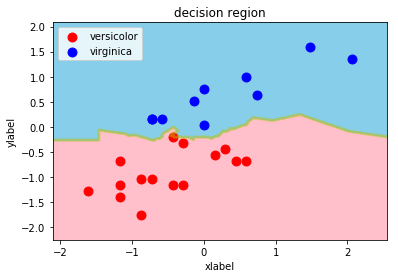

In [16]:
decision_region(X_test_scaler, y_pred_5nn, neigh_5nn)

## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト


In [17]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaler, y_train)
neigh_pred = neigh.predict(X_train_scaler)

neigh_result = [accuracy_score(y_train, neigh_pred), precision_score(y_train, neigh_pred), recall_score(y_train, neigh_pred), f1_score(y_train, neigh_pred)]

print(neigh_result)

[0.9333333333333333, 0.9428571428571428, 0.9166666666666666, 0.9295774647887323]


In [18]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(X_train_scaler, y_train)
lr_pred = lr.predict(X_train_scaler)
lr_result = [accuracy_score(y_train, lr_pred), precision_score(y_train, lr_pred), recall_score(y_train, lr_pred), f1_score(y_train, lr_pred)]
# print(lr_result)

print("▼ロジスティック回帰")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(lr_result[0], lr_result[1], lr_result[2], lr_result[3]))

▼ロジスティック回帰
正答率(accuracy_score):0.93, 適合率(precision):0.92, 再現率(Recall):0.94, F値:0.93


In [19]:
# SVM
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaler, y_train)
svc_pred = svc.predict(X_train_scaler)
svc_result = [accuracy_score(y_train, svc_pred), precision_score(y_train, svc_pred), recall_score(y_train, svc_pred), f1_score(y_train, svc_pred)]

print("▼SVM")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(svc_result[0], svc_result[1], svc_result[2], svc_result[3]))

▼SVM
正答率(accuracy_score):0.93, 適合率(precision):0.94, 再現率(Recall):0.92, F値:0.93


In [20]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaler, y_train)
dt_pred = dt.predict(X_train_scaler)
dt_result = [accuracy_score(y_train, dt_pred), precision_score(y_train, dt_pred), recall_score(y_train, dt_pred), f1_score(y_train, dt_pred)]

print("▼決定木")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt_result[0], dt_result[1], dt_result[2], dt_result[3]))

▼決定木
正答率(accuracy_score):0.99, 適合率(precision):0.97, 再現率(Recall):1.00, F値:0.99


In [21]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train_scaler, y_train)
rf_pred = rf.predict(X_train_scaler)
rf_result = [accuracy_score(y_train, rf_pred), precision_score(y_train, rf_pred), recall_score(y_train, rf_pred), f1_score(y_train, rf_pred)]

print("▼ランダムフォレスト")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(rf_result[0], rf_result[1], rf_result[2], rf_result[3]))


▼ランダムフォレスト
正答率(accuracy_score):0.89, 適合率(precision):0.89, 再現率(Recall):0.89, F値:0.89


/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
# 全分類期の指標値一覧

index_list = ["KNeighbors", "LogisticRegression", "SVC", "DecisionTree", "RandomForest"]
column_list = ["accuracy_score", "precision_score", "recall_score", "f1_score"]
result_list = [neigh_result, lr_result, svc_result, dt_result, rf_result]

list_table = pd.DataFrame(result_list, index=index_list, columns=column_list)
list_table


,accuracy_score,precision_score,recall_score,f1_score
KNeighbors,0.933333,0.942857,0.916667,0.929577
LogisticRegression,0.933333,0.918919,0.944444,0.931507
SVC,0.933333,0.942857,0.916667,0.929577
DecisionTree,0.986667,0.972973,1.000000,0.986301
RandomForest,0.893333,0.888889,0.888889,0.888889


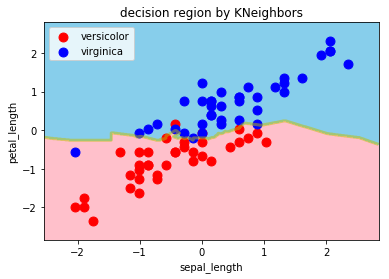

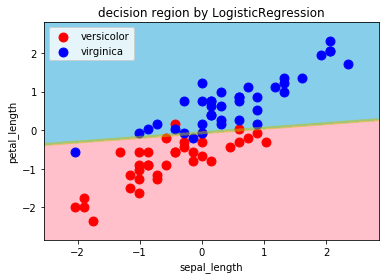

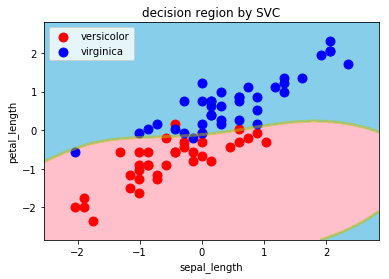

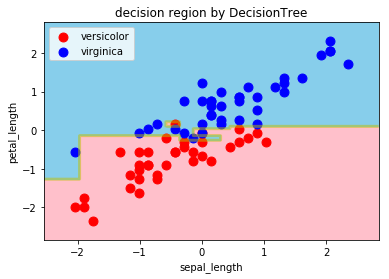

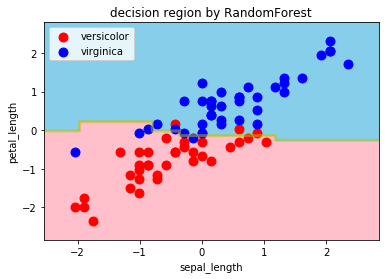

In [23]:
# 決定領域のグラフ化
classifier_list = [neigh, lr, svc, dt, rf]

for classifier, index in zip(classifier_list, index_list):
    decision_region(X_train_scaler, y_train,  classifier, title="decision region by {}".format(index),
                   xlabel="sepal_length", ylabel="petal_length")

## 考察
各指標値では決定木による分類が最も高い結果になった。決定木はif文の連続のような分類器なので、特徴量が2つで比較的簡単な分類のためか？
決定領域グラフも他のグラフと比べて他方のラベルと重なることなく分類している。

最近傍法とSVCは曲線で分類していて、ロジスティック回帰は線形、決定木・ランダムフォレストは四角に分類している。


## 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [24]:
# 標準化していない状態
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
neigh_ns = KNeighborsClassifier()
neigh_ns.fit(X_train, y_train)
neigh_pred_ns = neigh.predict(X_train)

neigh_result_ns = [accuracy_score(y_train, neigh_pred_ns), precision_score(y_train, neigh_pred_ns), recall_score(y_train, neigh_pred_ns), f1_score(y_train, neigh_pred_ns)]

print("▼最近傍法(標準化していない場合)")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(neigh_result_ns[0], neigh_result_ns[1], neigh_result_ns[2], neigh_result_ns[3]))

▼最近傍法(標準化していない場合)
正答率(accuracy_score):0.52, 適合率(precision):0.00, 再現率(Recall):0.00, F値:0.00


/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# 標準化していない状態
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

lr_ns = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_pred_ns = lr_ns.predict(X_train)
lr_result_ns = [accuracy_score(y_train, lr_pred_ns), precision_score(y_train, lr_pred_ns), recall_score(y_train, lr_pred_ns), f1_score(y_train, lr_pred_ns)]
# print(lr_result)

print("▼ロジスティック回帰(標準化していない場合)")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(lr_result_ns[0], lr_result_ns[1], lr_result_ns[2], lr_result_ns[3]))

▼ロジスティック回帰(標準化していない場合)
正答率(accuracy_score):0.89, 適合率(precision):0.94, 再現率(Recall):0.83, F値:0.88


In [26]:
# 標準化していない状態
# SVM
from sklearn.svm import SVC

svc_ns = SVC()
svc_ns.fit(X_train, y_train)
svc_pred_ns = svc_ns.predict(X_train)
svc_result_ns = [accuracy_score(y_train, svc_pred_ns), precision_score(y_train, svc_pred_ns), recall_score(y_train, svc_pred_ns), f1_score(y_train, svc_pred_ns)]

print("▼SVM(標準化していない場合)")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(svc_result_ns[0], svc_result_ns[1], svc_result_ns[2], svc_result_ns[3]))

▼SVM(標準化していない場合)
正答率(accuracy_score):0.93, 適合率(precision):0.90, 再現率(Recall):0.97, F値:0.93


In [27]:
# 標準化していない状態
# 決定木
from sklearn.tree import DecisionTreeClassifier

dt_ns = DecisionTreeClassifier()
dt_ns.fit(X_train, y_train)
dt_pred_ns = dt.predict(X_train)
dt_result_ns = [accuracy_score(y_train, dt_pred_ns), precision_score(y_train, dt_pred_ns), recall_score(y_train, dt_pred_ns), f1_score(y_train, dt_pred_ns)]

print("▼決定木(標準化していない場合)")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt_result_ns[0], dt_result_ns[1], dt_result_ns[2], dt_result_ns[3]))

▼決定木(標準化していない場合)
正答率(accuracy_score):0.52, 適合率(precision):0.00, 再現率(Recall):0.00, F値:0.00


/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# 標準化していない状態
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

rf_ns = RandomForestClassifier(max_depth=2)
rf_ns.fit(X_train, y_train)
rf_pred_ns = rf.predict(X_train)
rf_result_ns = [accuracy_score(y_train, rf_pred_ns), precision_score(y_train, rf_pred_ns), recall_score(y_train, rf_pred_ns), f1_score(y_train, rf_pred_ns)]

print("▼ランダムフォレスト(標準化していない場合)")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(rf_result_ns[0], rf_result_ns[1], rf_result_ns[2], rf_result_ns[3]))


▼ランダムフォレスト(標準化していない場合)
正答率(accuracy_score):0.52, 適合率(precision):0.00, 再現率(Recall):0.00, F値:0.00


/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
# 全分類期の指標値一覧

index_list = ["KNeighbors", "LogisticRegression", "SVC", "DecisionTree", "RandomForest"]
column_list = ["accuracy_score", "precision_score", "recall_score", "f1_score"]
result_ns_list = [neigh_result_ns, lr_result_ns, svc_result_ns, dt_result_ns, rf_result_ns]

list_ns_table = pd.DataFrame(result_ns_list, index=index_list, columns=column_list)
list_ns_table


,accuracy_score,precision_score,recall_score,f1_score
KNeighbors,0.520000,0.000000,0.000000,0.000000
LogisticRegression,0.893333,0.937500,0.833333,0.882353
SVC,0.933333,0.897436,0.972222,0.933333
DecisionTree,0.520000,0.000000,0.000000,0.000000
RandomForest,0.520000,0.000000,0.000000,0.000000


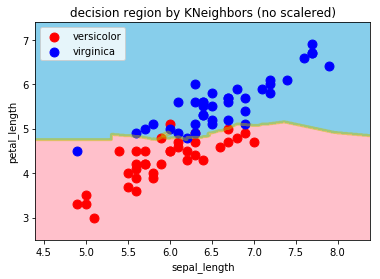

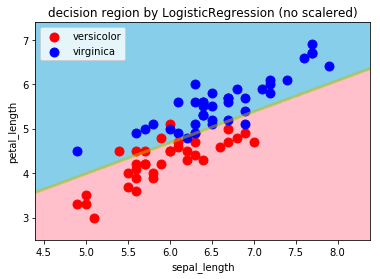

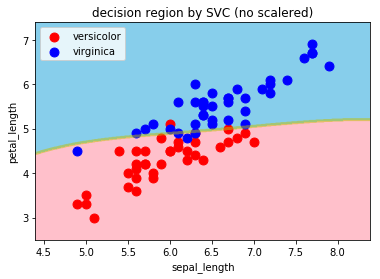

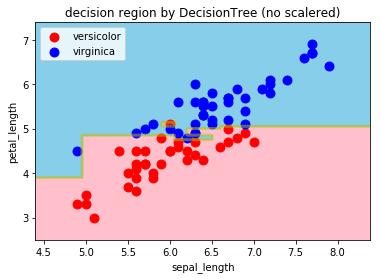

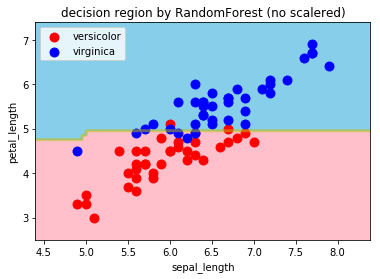

In [30]:
# 決定領域のグラフ化
classifier_list = [neigh_ns, lr_ns, svc_ns, dt_ns, rf_ns]

for classifier, index in zip(classifier_list, index_list):
    decision_region(X_train, y_train,  classifier, title="decision region by {} (no scalered)".format(index),
                   xlabel="sepal_length", ylabel="petal_length")

## 考察
各指標値には標準化の有無でさほど数値の変化はなかった。今回のデータセットでは特徴量同士で単位も桁数も違いがないため影響がないのだと思われる。
（特徴量内での桁数の幅や特徴量間での桁数の相違がある場合は標準化しないと結果に影響がある。）
グラフには変化があった。ロジスティック回帰では傾きが急になり、決定木やランダムフォレストは単調になった。標準化しないことで微細な分類ができなくなったということと思われる。



## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。


決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です

In [31]:
# df_allに再構築
df_all = df_0.iloc[:, [0, 2, 4]]
display(df_all.head())
display(df_all.tail())

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


,sepal_length,petal_length,Species
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2
149,5.9,5.1,2


In [32]:
from sklearn.model_selection import train_test_split

X_all = df_all.iloc[:, :2].values
y_all = df_all.iloc[:, 2].values

X_all_train, X_all_test, y_all_train, y_all_test =  train_test_split(X_all, y_all, test_size=0.25)
print(X_all_train.shape)
print(X_all_test.shape)
print(y_all_train.shape)
print(y_all_test.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_all_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_all_train_scaler = scaler.transform(X_all_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_all_test_scaler = scaler.transform(X_all_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# デフォルト5で分類
neigh_5nn = KNeighborsClassifier()

# 訓練データの検証
neigh_5nn.fit(X_all_train_scaler, y_all_train)

# 検証データの推定
y_pred_5nn = neigh_5nn.predict(X_all_test_scaler)

print("▼n_neighors")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(accuracy_score(y_all_test, y_pred_5nn), 
              precision_score(y_all_test, y_pred_5nn, average="macro"), 
              recall_score(y_all_test, y_pred_5nn, average="macro"),
              f1_score(y_all_test, y_pred_5nn, average="macro")))
print("混同行列は\n{}".format(confusion_matrix(y_all_test, y_pred_5nn)))

▼n_neighors
正答率(accuracy_score):0.97, 適合率(precision):0.97, 再現率(Recall):0.97, F値:0.97
混同行列は
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


In [35]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(X_all_train_scaler, y_all_train)
lr_pred = lr.predict(X_all_train_scaler)
lr_result = [accuracy_score(y_all_train, lr_pred), 
             precision_score(y_all_train, lr_pred, average="macro"), 
             recall_score(y_all_train, lr_pred, average="macro"), 
             f1_score(y_all_train, lr_pred, average="macro")]
# print(lr_result)

print("▼ロジスティック回帰")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(lr_result[0], lr_result[1], lr_result[2], lr_result[3]))

▼ロジスティック回帰
正答率(accuracy_score):0.87, 適合率(precision):0.89, 再現率(Recall):0.87, F値:0.87


In [36]:
# SVM
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_all_train_scaler, y_all_train)
svc_pred = svc.predict(X_all_train_scaler)
svc_result = [accuracy_score(y_all_train, svc_pred), 
              precision_score(y_all_train, svc_pred, average="macro"),
              recall_score(y_all_train, svc_pred, average="macro"),
              f1_score(y_all_train, svc_pred, average="macro")]

print("▼SVM")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(svc_result[0], svc_result[1], svc_result[2], svc_result[3]))

▼SVM
正答率(accuracy_score):0.94, 適合率(precision):0.94, 再現率(Recall):0.94, F値:0.94


In [37]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_all_train_scaler, y_all_train)
dt_pred = dt.predict(X_all_train_scaler)
dt_result = [accuracy_score(y_all_train, dt_pred), 
             precision_score(y_all_train, dt_pred, average="macro"),
             recall_score(y_all_train, dt_pred, average="macro"), 
             f1_score(y_all_train, dt_pred, average="macro")]

print("▼決定木")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt_result[0], dt_result[1], dt_result[2], dt_result[3]))

▼決定木
正答率(accuracy_score):1.00, 適合率(precision):1.00, 再現率(Recall):1.00, F値:1.00


In [38]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_all_train_scaler, y_all_train)
rf_pred = rf.predict(X_all_train_scaler)
rf_result = [accuracy_score(y_all_train, rf_pred), 
             precision_score(y_all_train, rf_pred, average="macro"), 
             recall_score(y_all_train, rf_pred, average="macro"),
             f1_score(y_all_train, rf_pred, average="macro")]

print("▼ランダムフォレスト")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(rf_result[0], rf_result[1], rf_result[2], rf_result[3]))


▼ランダムフォレスト
正答率(accuracy_score):0.93, 適合率(precision):0.93, 再現率(Recall):0.93, F値:0.93


In [39]:
# 全分類期の指標値一覧

index_list = ["KNeighbors", "LogisticRegression", "SVC", "DecisionTree", "RandomForest"]
column_list = ["accuracy_score", "precision_score", "recall_score", "f1_score"]
result_list = [neigh_result, lr_result, svc_result, dt_result, rf_result]

print("目的変数を3つにし、適合率・再現率・F値を　macro平均で計算")
list_table = pd.DataFrame(result_list, index=index_list, columns=column_list)
list_table

目的変数を3つにし、適合率・再現率・F値を　macro平均で計算


,accuracy_score,precision_score,recall_score,f1_score
KNeighbors,0.933333,0.942857,0.916667,0.929577
LogisticRegression,0.866071,0.891254,0.871570,0.865352
SVC,0.937500,0.941270,0.939046,0.939230
DecisionTree,1.000000,1.000000,1.000000,1.000000
RandomForest,0.928571,0.931306,0.930949,0.930724


In [40]:
# 全変数仕様のグラフ描画関数

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue',]
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

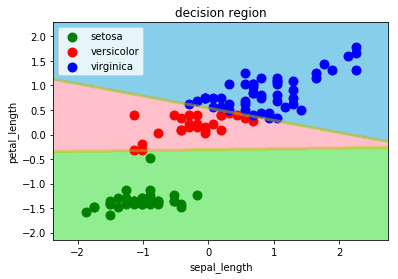

In [41]:
decision_region2(X_all_train_scaler, lr_pred, lr, title="decision region",xlabel="sepal_length", ylabel="petal_length")

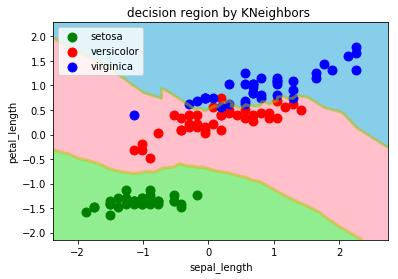

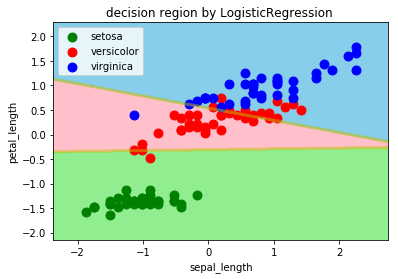

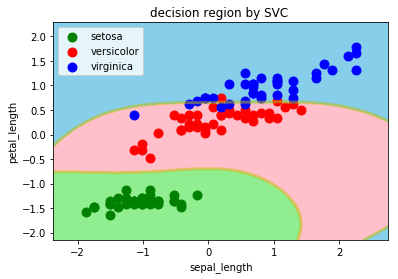

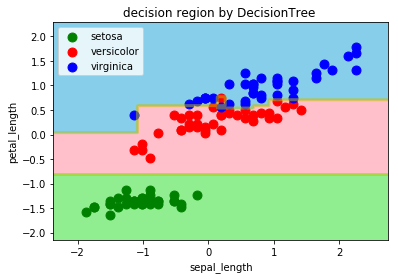

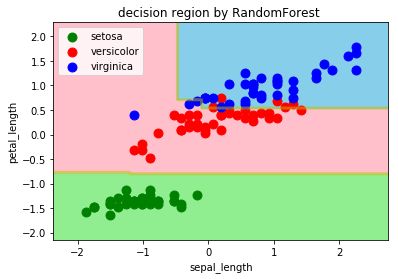

In [42]:
# 決定領域のグラフ化
classifier_list = [neigh_5nn, lr, svc, dt, rf]

for classifier, index in zip(classifier_list, index_list):
    decision_region2(X_all_train_scaler, y_all_train,  classifier, title="decision region by {} ".format(index),
                   xlabel="sepal_length", ylabel="petal_length")

## >>学習と推定、評価を行って、最も精度の高い手法を探してください。

## 回答
最も精度の高い手法は「決定木」であった。やはり特徴量ラベルの数が少ないからか。


## 参考
matplotlibのcontourf　https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.contourf.html

## 作業時間
7h